<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/forest_fire_prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip /content/forest+fires.zip

Archive:  /content/forest+fires.zip
  inflating: forestfires.csv         
  inflating: forestfires.names       


In [3]:
with open("/content/forestfires.names", "r", encoding="latin-1") as f:
    lines = f.readlines()
    for i in range(len(lines)):
        if i % 2 == 0:
            print(lines[i][:-2], end=" ")
        else:
            print(lines[i])

Citation Request   This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 

  Please include this citation if you plan to use this database 

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.   In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 

  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,   Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 

  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pd 

1. Title: Forest Fire 

2. Source    Created by: Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007

   3. Past Usage:

    P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.

   In Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence,    December, 2007. (http://www.dsi.uminho.pt/~pcortez/fires.pdf)


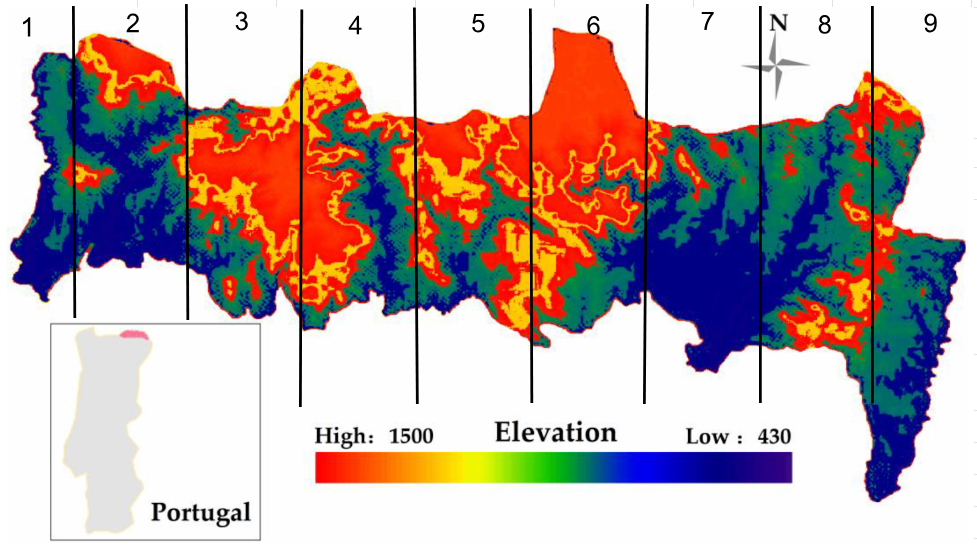

In [4]:
df = pd.read_csv("/content/forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
def describe_feature(data):
    print(f"Mean: {np.mean(data)}")
    print(f"Median: {np.median(data)}")
    print(f"Mode: {data.mode()[0]}")

    print(f"Std: {np.std(data)}")
    print(f"Variance: {np.var(data)}")

#Distribution of Area Feature

In [8]:
bins = int(1+np.log2(len(df)))

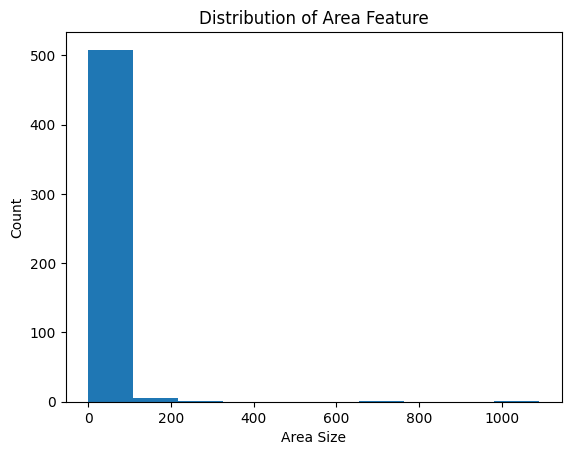

In [9]:
plt.hist(df["area"], bins=bins)
plt.title("Distribution of Area Feature")
plt.xlabel("Area Size")
plt.ylabel("Count")
plt.show()

The distribution is difficult to interpret due to the presence of outliers, which stretch the data and distort its shape. To obtain a clearer view of the main trend, we will exclude or hide these extreme outliers.

In [10]:
describe_feature(df["area"])

Mean: 12.847292069632493
Median: 0.52
Mode: 0.0
Std: 63.594225982818216
Variance: 4044.2255783537516


As we can see, the mean is 12.84 and the standard deviation is 63.65, indicating a strong positive skew in the data. The maximum value of 1090 stands out as an extreme observation, suggesting the presence of outliers. Therefore, we will proceed to identify and analyze these outliers.

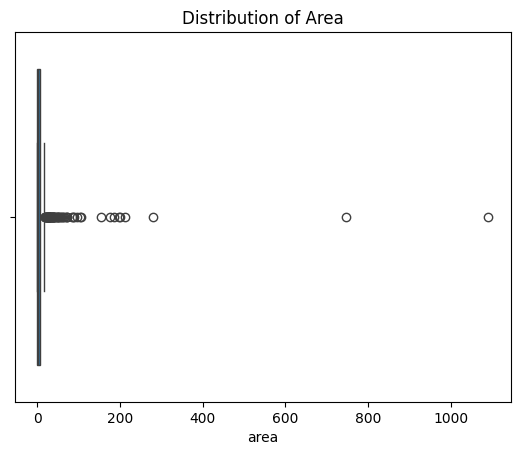

In [11]:
sns.boxplot(x="area", data=df)
plt.title("Distribution of Area")
plt.show()

In [12]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
Upper_bound = Q3 + 2.5 * IQR # For bigger bound

df[df["area"] > Upper_bound].sort_values(by="area").head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
209,8,3,sep,thu,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,23.41
210,4,4,oct,sat,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0,24.23
284,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24
386,3,4,sep,sun,90.5,96.7,750.5,11.4,20.6,55,5.4,0.0,24.59
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77


In [13]:
bins_area = int(1 + np.log2(len(df[df["area"] <= Upper_bound])))

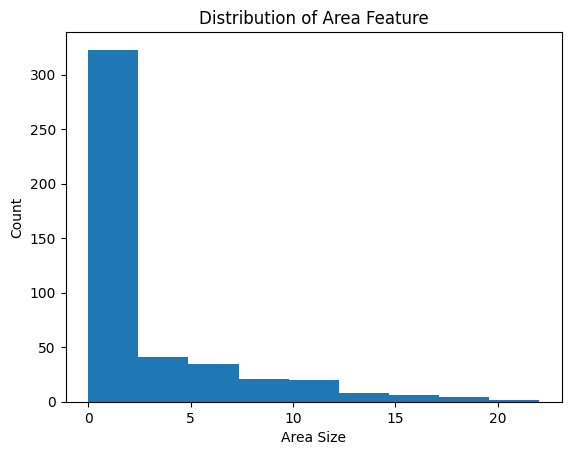

In [14]:
plt.hist(df[df["area"] <= Upper_bound]["area"], bins=bins_area)
plt.title("Distribution of Area Feature")
plt.xlabel("Area Size")
plt.ylabel("Count")
plt.show()

As we can see, the data is right-skewed, indicating that as the burned area increases, the number of fire incidents tends to decrease. Most fires occur in smaller areas, typically where the burned area is less than or equal to 5 hectares.

# Distribution of Temperature

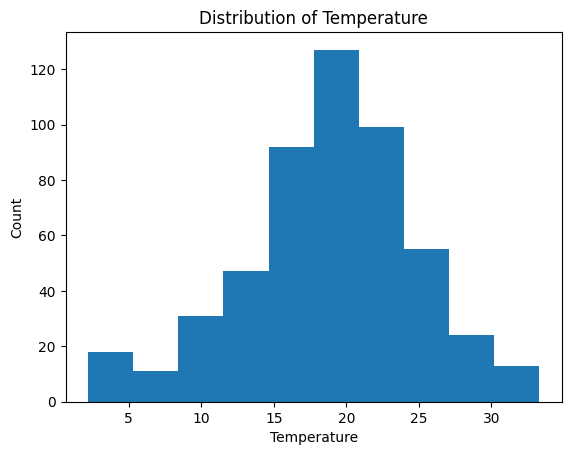

In [15]:
plt.hist(df["temp"], bins=bins)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

In [16]:
describe_feature(df["temp"])

Mean: 18.88916827852998
Median: 19.3
Mode: 17.4
Std: 5.8010069395983646
Variance: 33.65168151326838


It is almost a normal distribution, indicating that most values are concentrated around the mean with relatively few extreme observations. This suggests that the data is fairly balanced, and variations are generally consistent across the range.

#Distribution of Temperature ISI

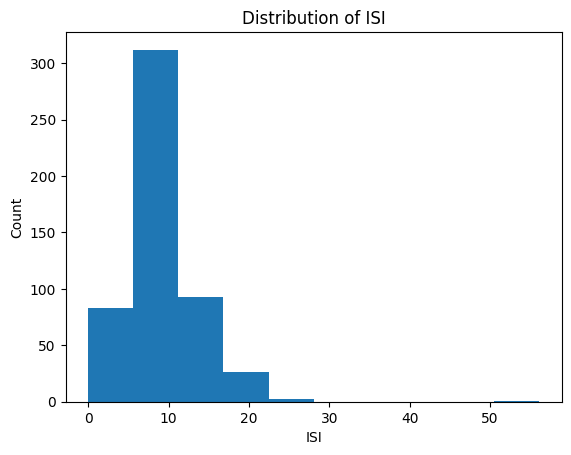

In [17]:
plt.hist(df["ISI"], bins=bins)
plt.title("Distribution of ISI")
plt.xlabel("ISI")
plt.ylabel("Count")
plt.show()

In [18]:
describe_feature(df["ISI"])

Mean: 9.021663442940039
Median: 8.4
Mode: 9.6
Std: 4.55506548847883
Variance: 20.748621604330882


In [19]:
df["ISI"].quantile(0.95)

np.float64(17.0)

In [20]:
np.max(df["ISI"])

56.1

As we can see, the data is right-skewed, meaning that higher ISI values (around 55) occur infrequently. Most observations are concentrated within lower ISI ranges — approximately 95% of the values are below 17 — while a few higher ISI values appear as mild outliers.

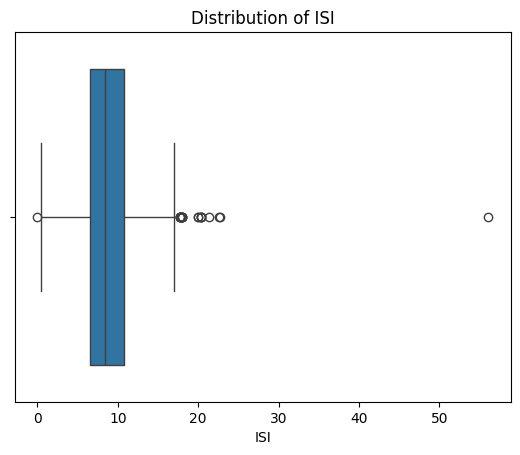

In [21]:
sns.boxplot(x="ISI", data=df)
plt.title("Distribution of ISI")
plt.show()

In [22]:
Q1 = df['ISI'].quantile(0.25)
Q3 = df['ISI'].quantile(0.75)
IQR = Q3 - Q1
Upper_bound = Q3 + 1.5 * IQR

In [23]:
outliers_isi = df[df["ISI"] > Upper_bound]
print(f"Outlier counts {len(outliers_isi)}")
outliers_isi

Outlier counts 22


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
11,7,5,sep,sat,92.8,73.2,713.0,22.6,19.3,38,4.0,0.0,0.00
22,7,4,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.00
24,7,4,aug,sat,93.5,139.4,594.2,20.3,23.7,32,5.8,0.0,0.00
133,4,6,sep,thu,93.7,80.9,685.2,17.9,17.6,42,3.1,0.0,0.00
135,3,5,aug,sat,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00
149,8,6,sep,thu,93.7,80.9,685.2,17.9,23.7,25,4.5,0.0,1.12
206,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45
209,8,3,sep,thu,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,23.41
211,7,4,aug,sat,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0,26.00
266,6,5,aug,tue,94.3,131.7,607.1,22.7,19.4,55,4.0,0.0,0.17


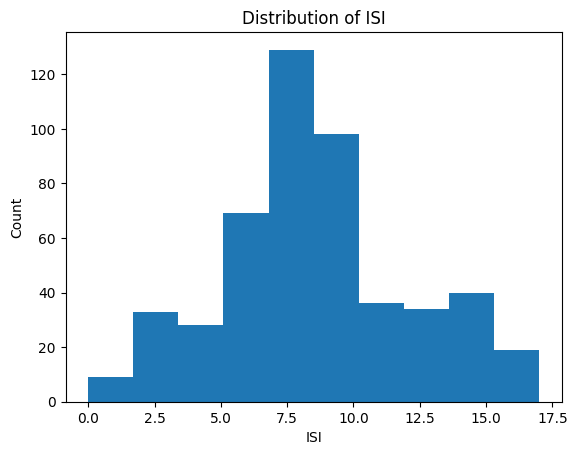

In [24]:
plt.hist(df[df["ISI"] < Upper_bound]["ISI"], bins=bins)
plt.title("Distribution of ISI")
plt.xlabel("ISI")
plt.ylabel("Count")
plt.show()

In [25]:
no_outliers_isi = df[df["ISI"] < Upper_bound]["ISI"]

In [26]:
describe_feature(no_outliers_isi)

Mean: 8.497171717171717
Median: 8.2
Mode: 9.6
Std: 3.529653899078619
Variance: 12.458456647280897


The temperature distribution is slightly right-skewed due to a few extreme outliers. However, excluding these extreme values, the data appears approximately normally distributed. The mean value is around 8.5 ISI in the Fire Weather Index, indicating moderate fire intensity under typical conditions.

#Plot the distribution of Y

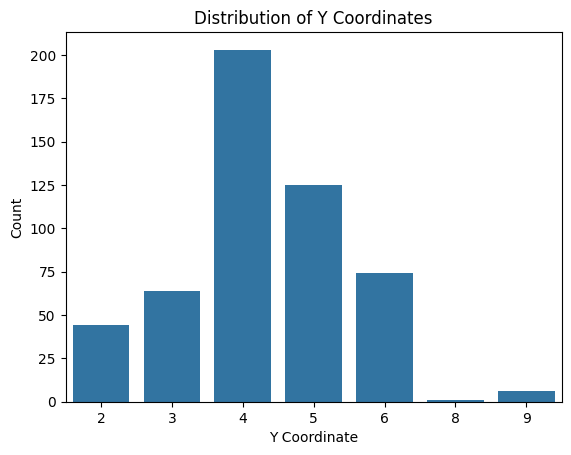

In [27]:
df_sorted = df.sort_values(by="Y")

sns.countplot(x="Y", data=df_sorted)
plt.title("Distribution of Y Coordinates")
plt.xlabel("Y Coordinate")
plt.ylabel("Count")
plt.show()

In [28]:
describe_feature(df_sorted["Y"])

Mean: 4.299806576402321
Median: 4.0
Mode: 4
Std: 1.2287103684557075
Variance: 1.5097291695505604


The Y Coordinate represents discrete data, with a median and mode of 4 and a mean of 4.3. This indicates a slight right skew, although the distribution is nearly normal. Most fire incidents occur around coordinate 4, followed by coordinate 5.

Next, let's examine the correlation between this variable and the other columns to identify potential relationships.

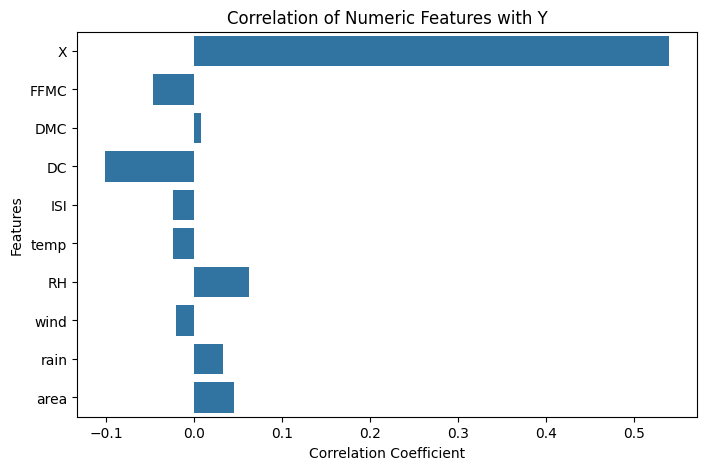

In [29]:
corr_with_Y = df.select_dtypes(include='number').corr()["Y"].drop("Y")


plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_Y.values, y=corr_with_Y.index)
plt.title("Correlation of Numeric Features with Y")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

# Heatmap for Features Correlations

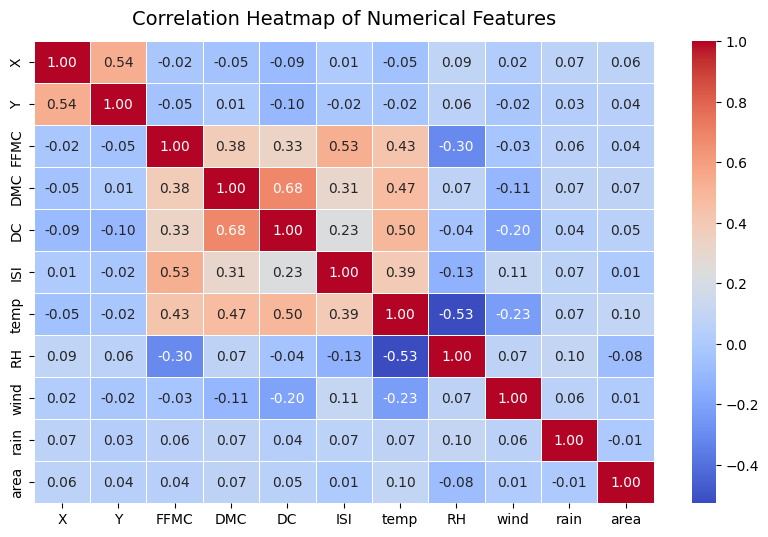

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=12)
plt.show()


This relationship is logical because both DMC (Duff Moisture Code) and DC (Drought Code) measure the dryness of forest fuels and soil. As temperature increases, evaporation rates rise and moisture levels drop, leading to higher DMC and DC values — which explains their strong positive correlation with temperature.

On the other hand, Relative Humidity (RH) tends to decrease as temperature increases, since warmer air can hold more moisture before reaching saturation. This inverse relationship naturally results in a negative correlation between RH and temperature.

In summary, these correlations reflect typical environmental interactions during dry, fire-prone conditions: higher temperatures and lower humidity contribute to increased dryness in forest materials, raising fire risk.

# Total area for each X values

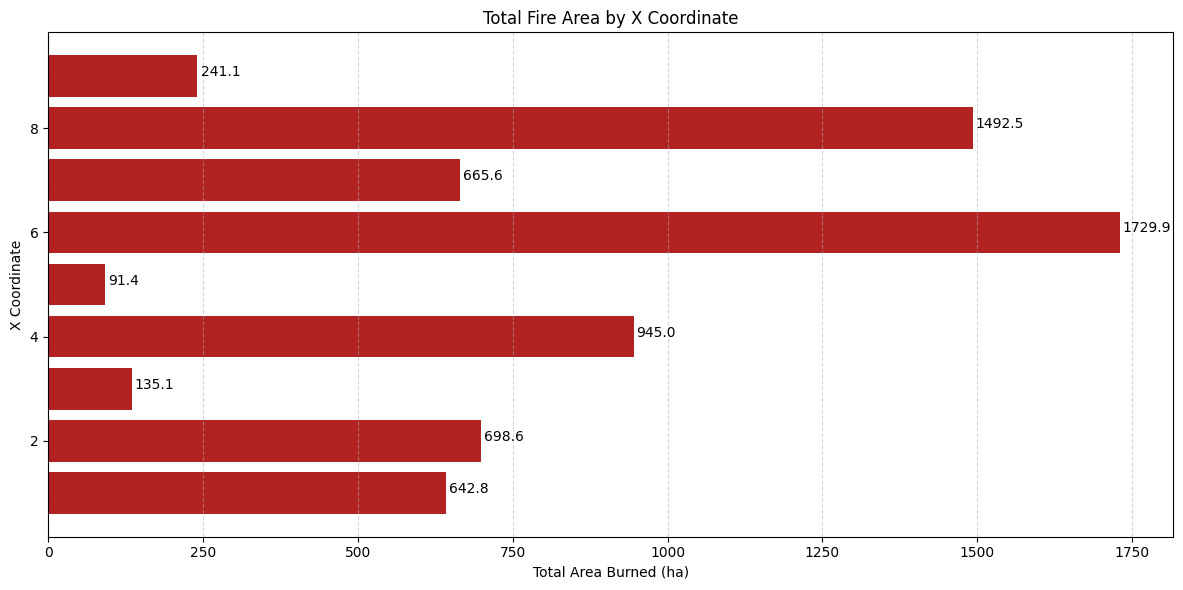

In [31]:
total_area_x = df.groupby("X")["area"].sum().sort_index(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(total_area_x.index, total_area_x.values, color="firebrick")

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}")

plt.title("Total Fire Area by X Coordinate")
plt.xlabel("Total Area Burned (ha)")
plt.ylabel("X Coordinate")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
print(f"🔥 Total area burned across all X coordinates: {df['area'].sum():.2f}")

🔥 Total area burned across all X coordinates: 6642.05


As we can see, the largest burned area corresponds to coordinate 6 (1730 ha), followed by 8 (1493 ha). In contrast, the smallest burned areas are observed at coordinates 5 (91.4 ha) and 3 (135 ha).

Next, let's explore why the most fires occur in these specific areas — this could be influenced by factors such as vegetation type, microclimate conditions, terrain, or human activity that make certain regions more prone to ignition and fire spread.

#Count of Forest Fire acroos all X coordinates

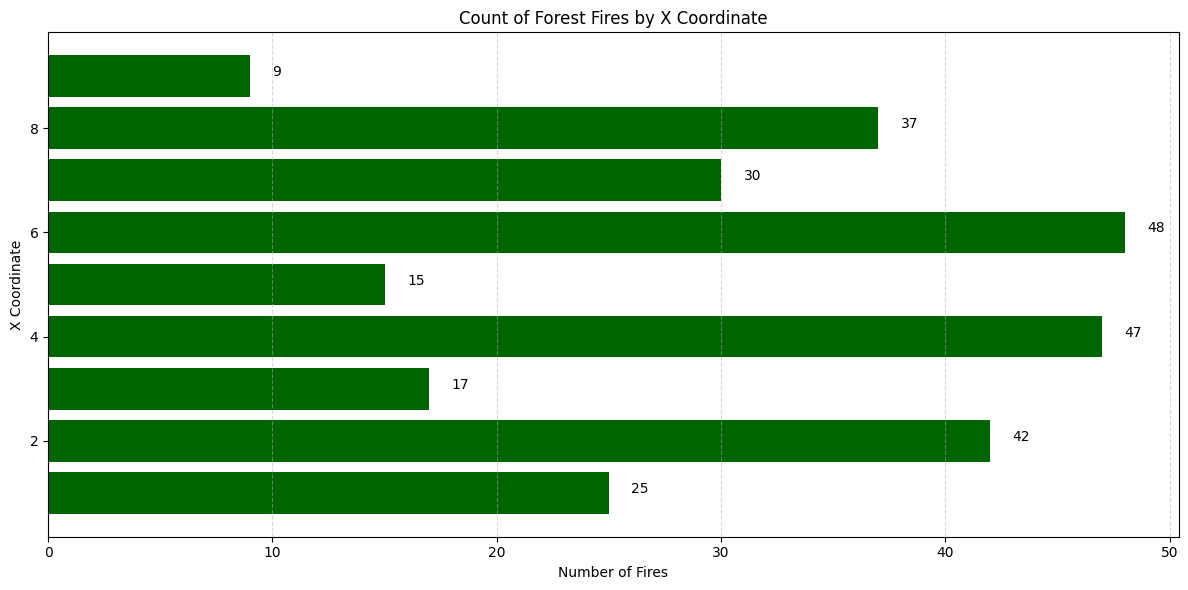

In [33]:
fire_counts_x = df.groupby("X")["area"].apply(lambda x: (x > 0).sum())

plt.figure(figsize=(12, 6))
bars = plt.barh(fire_counts_x.index, fire_counts_x.values, color="darkgreen")

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}")

plt.title("Count of Forest Fires by X Coordinate")
plt.xlabel("Number of Fires")
plt.ylabel("X Coordinate")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Which is the coordinate with greatest number of fires?

In [34]:
df["Coordinates"] = df["X"].astype(str) + "-" + df["Y"].astype(str)

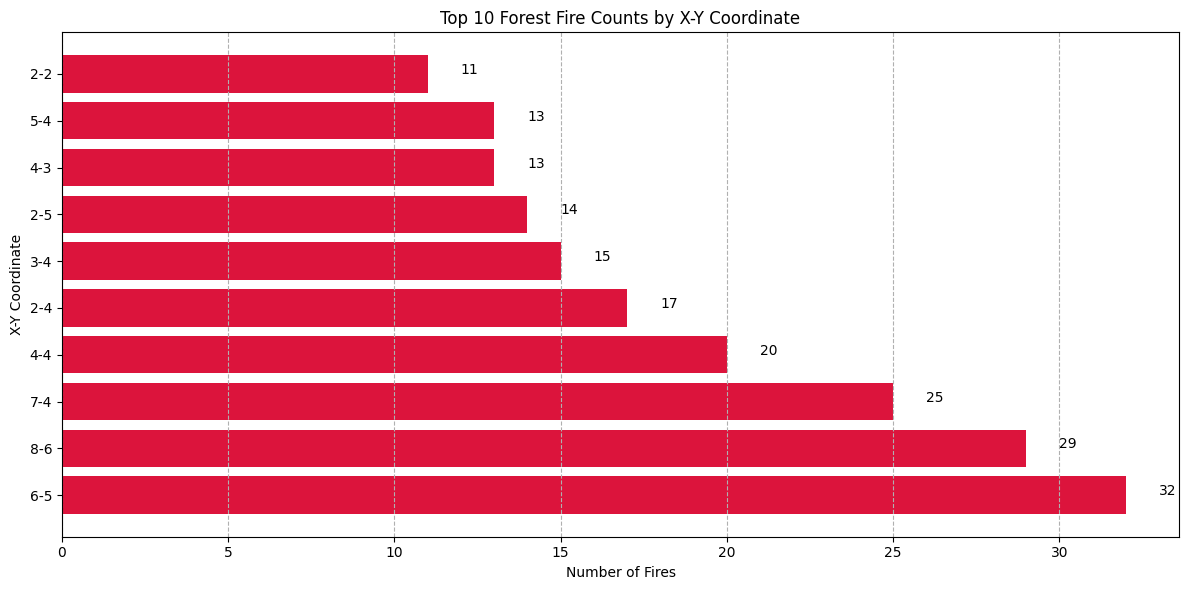

In [35]:
fire_counts_xy = (
    df.groupby("Coordinates")["area"]
    .apply(lambda x: (x > 0).sum())
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
bars = plt.barh(fire_counts_xy.index, fire_counts_xy.values, color="crimson")

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}")

plt.title("Top 10 Forest Fire Counts by X-Y Coordinate")
plt.xlabel("Number of Fires")
plt.ylabel("X-Y Coordinate")
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

#In which month do the most fires occur?

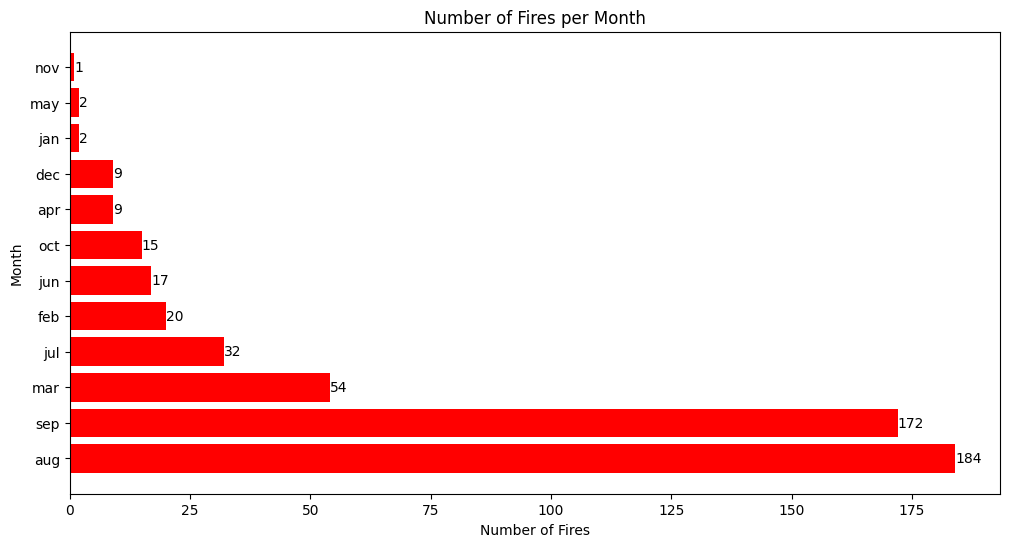

In [36]:
monthly_fire = df["month"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

bars = plt.barh(monthly_fire.index, monthly_fire.values, color="red")
plt.xlabel("Number of Fires")
plt.ylabel("Month")
plt.title("Number of Fires per Month")
plt.bar_label(bars)
plt.show()

The majority of fire incidents occur during August (184 cases) and September (172 cases). This pattern suggests that late summer to early autumn is the peak fire season, likely due to high temperatures, low humidity, and dry vegetation during these months.

# Average Temperature by Month

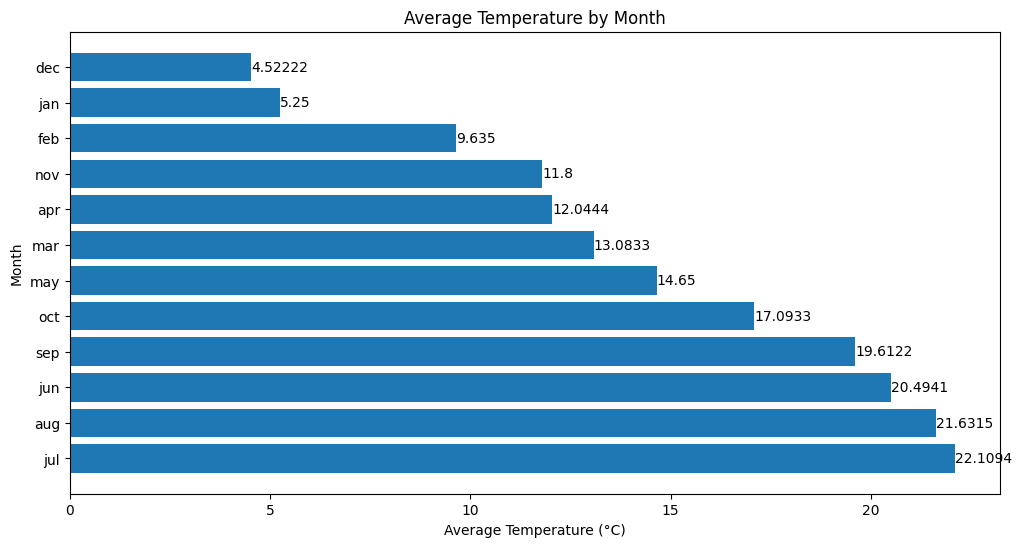

In [37]:
monthly_temp = df.groupby("month")["temp"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(monthly_temp.index, monthly_temp.values)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Month")
plt.title("Average Temperature by Month")
plt.bar_label(bars)
plt.show()

As expected, the summer months have the highest temperatures, and correspondingly, August and September show the most fire incidents. This suggests a clear connection between high temperatures and increased fire activity

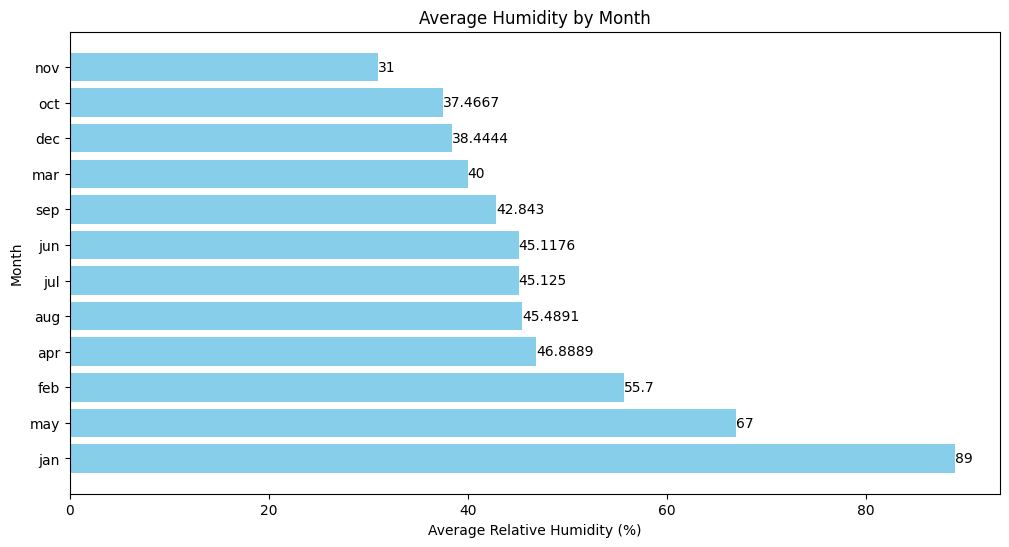

In [38]:
month_humanity = df.groupby("month")["RH"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(month_humanity.index, month_humanity.values, color="skyblue")
plt.xlabel("Average Relative Humidity (%)")
plt.ylabel("Month")
plt.title("Average Humidity by Month")
plt.bar_label(bars)
plt.show()

As we can see, January and May have the highest humidity levels, and these months also record the lowest number of fire incidents. In contrast, August and September show moderate humidity, aligning with the peak fire season. Interestingly, November, despite having low humidity, also shows fewer fires, which may be influenced by lower temperatures and reduced vegetation dryness during that period.

#Average Drought by Month

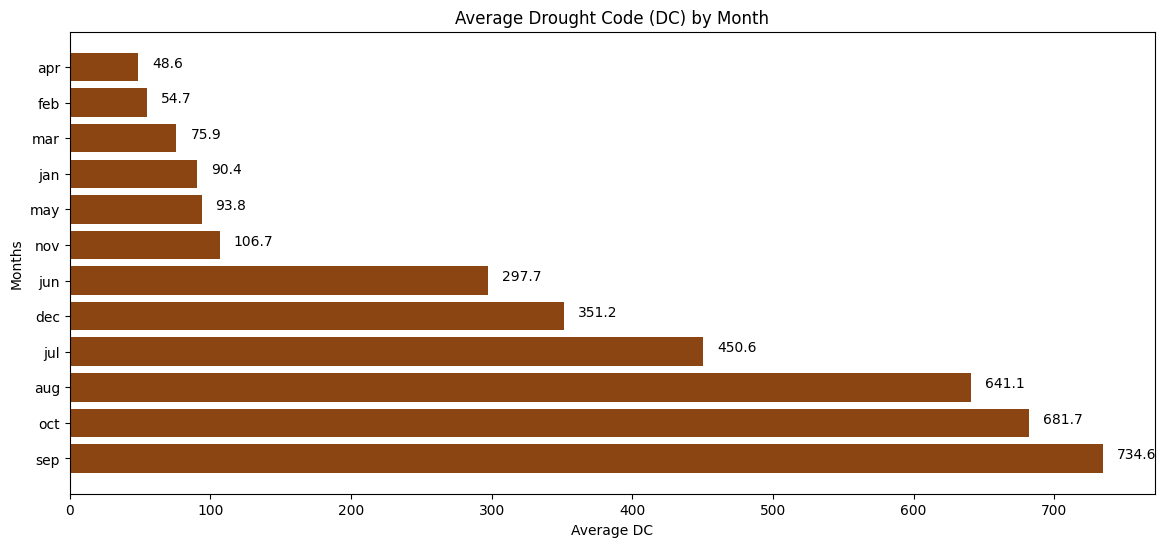

In [39]:
avg_dc_month = df.groupby("month")["DC"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.barh(avg_dc_month.index, avg_dc_month.values, color="saddlebrown")

for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}")

plt.title("Average Drought Code (DC) by Month")
plt.xlabel("Average DC")
plt.ylabel("Months")
plt.show()

As we can see, the Drought Code (DC) values are highest during September, October, and August. Notably, September and August also correspond to the months with the most fire incidents, suggesting that drought conditions may play a significant role in increasing fire risk. Prolonged dryness reduces fuel moisture, making vegetation more flammable and easier to ignite.

# Let's see the effect of wind on the area

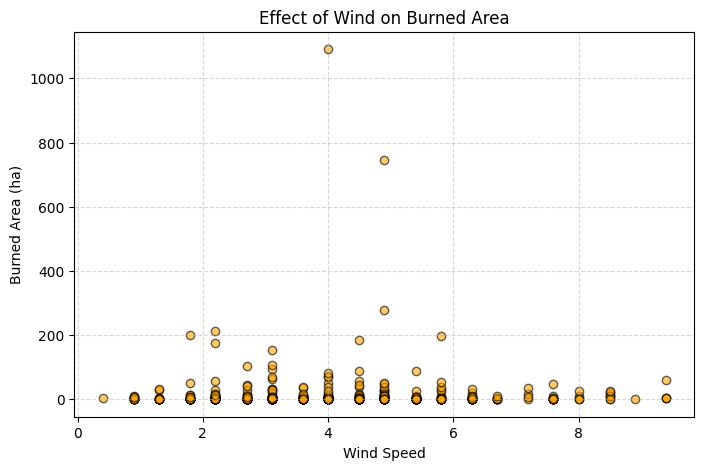

In [40]:
plt.figure(figsize=(8, 5))
plt.scatter(df["wind"], df["area"], alpha=0.6, color="orange", edgecolor="k")
plt.xlabel("Wind Speed")
plt.ylabel("Burned Area (ha)")
plt.title("Effect of Wind on Burned Area")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

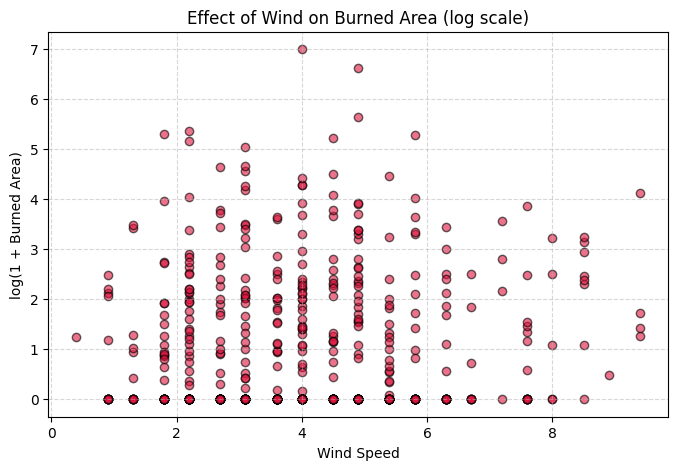

In [41]:
plt.figure(figsize=(8, 5))
plt.scatter(df["wind"], np.log1p(df["area"]), alpha=0.6, color="crimson", edgecolor="k")
plt.xlabel("Wind Speed")
plt.ylabel("log(1 + Burned Area)")
plt.title("Effect of Wind on Burned Area (log scale)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

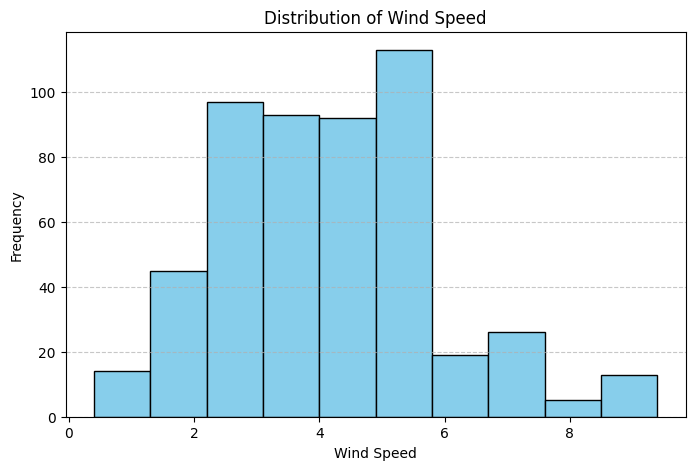

In [42]:
plt.figure(figsize=(8, 5))
plt.hist(df["wind"], bins=bins, color="skyblue", edgecolor="black")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.title("Distribution of Wind Speed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [43]:
corr_wind_area = df["wind"].corr(df["area"])
print(f"Correlation between wind and area: {corr_wind_area:.3f}")

Correlation between wind and area: 0.012


The data appears to be widely dispersed, which explains the low correlation between wind and other variables. However, most wind observations cluster around a speed of 5 km/h, and the distribution of wind speed is approximately normal.

This suggests that moderate winds are the most common and are often sufficient to support fire spread, while very high or very low wind speeds are less frequent. The relatively weak correlation may also indicate that wind alone does not strongly determine fire size, but rather interacts with other factors such as humidity, temperature, and fuel dryness to influence fire behavior.